# [**Agglomération avec et sans structure**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/2_3_cluster/plot_agglomerative_clustering.ipynb)<br/>([*Agglomerative clustering with and without structure*](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering.html))

Cet exemple montre l'effet de l'imposition d'un graphe de connectivité pour capturer la structure locale dans les données. Le graphique est simplement le graphique des 20 voisins les plus proches.

Il y a deux avantages à imposer une connectivité. Premièrement, le clustering sans matrice de connectivité est beaucoup plus rapide.

Deuxièmement, lors de l'utilisation d'une matrice de connectivité, les liens simples, moyens et complets sont instables et ont tendance à créer quelques clusters qui se développent très rapidement. En effet, la liaison moyenne et complète combat ce comportement de percolation en considérant toutes les distances entre deux clusters lors de leur fusion (alors que la liaison simple exagère le comportement en ne considérant que la distance la plus courte entre les clusters). Le graphique de connectivité rompt ce mécanisme pour une liaison moyenne et complète, les faisant ressembler à la liaison simple plus fragile. Cet effet est plus prononcé pour les graphes très creux (essayez de diminuer le nombre de voisins dans `kneighbors_graph`) et avec une liaison complète. En particulier, avoir un très petit nombre de voisins dans le graphe, impose une géométrie proche de celle de la liaison simple, qui est bien connue pour avoir cette instabilité de percolation.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_001.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_002.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_003.png)
![](https://scikit-learn.org/stable/_images/sphx_glr_plot_agglomerative_clustering_004.png)

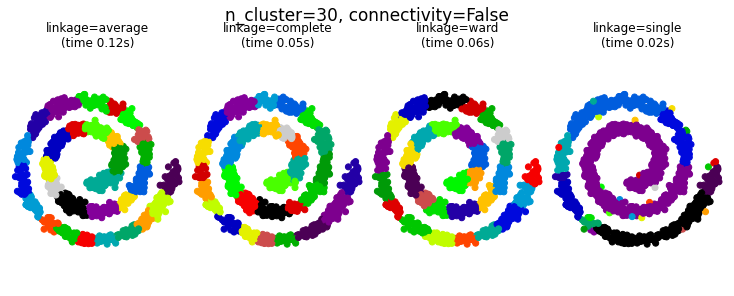

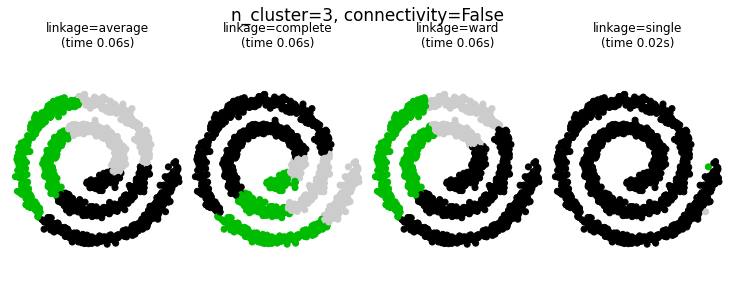

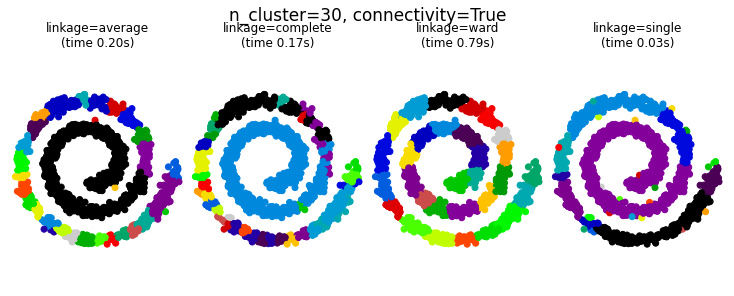

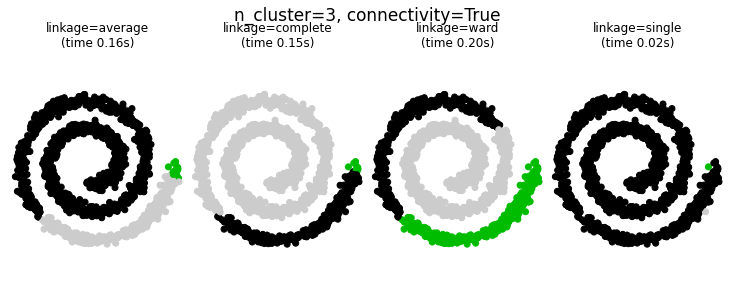

In [7]:
# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

# Generate sample data
n_samples = 1500
np.random.seed(0)
t = 1.5 * np.pi * (1 + 3 * np.random.rand(1, n_samples))
x = t * np.cos(t)
y = t * np.sin(t)


X = np.concatenate((x, y))
X += 0.7 * np.random.randn(2, n_samples)
X = X.T

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data
knn_graph = kneighbors_graph(X, 30, include_self=False)

for connectivity in (None, knn_graph):
    for n_clusters in (30, 3):
        plt.figure(figsize=(10, 4))
        for index, linkage in enumerate(("average", "complete", "ward", "single")):
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(
                linkage=linkage, connectivity=connectivity, n_clusters=n_clusters
            )
            t0 = time.time()
            model.fit(X)
            elapsed_time = time.time() - t0
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=plt.cm.nipy_spectral)
            plt.title(
                "linkage=%s\n(time %.2fs)" % (linkage, elapsed_time),
                fontdict=dict(verticalalignment="top"),
            )
            plt.axis("equal")
            plt.axis("off")

            plt.subplots_adjust(bottom=0, top=0.83, wspace=0, left=0, right=1)
            plt.suptitle(
                "n_cluster=%i, connectivity=%r"
                % (n_clusters, connectivity is not None),
                size=17,
            )


plt.show()